In [1]:
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt

# Prepare Dataset

In [2]:
df = pd.read_csv('statistics.csv')

In [3]:
df["created_on"] = pd.to_datetime(df["created_on"])
df["updated_on"] = pd.to_datetime(df["updated_on"])

In [4]:
df["hour"] = df["created_on"].dt.hour
df["hourminute"] = df["created_on"].dt.hour + (df["created_on"].dt.minute /60)
df["day"] = df["created_on"].dt.day_name(locale ='German')
ref_date = pd.to_datetime(date(2023, 11, 29))
df["dayscount"] = (df["created_on"] - ref_date).dt.components.days
df  = df[df["dayscount"] >=2] 
df

,id,tokencount,department,messagecount,method,created_on,updated_on,hour,hourminute,day,dayscount
91,98,424,ITM-KM-IL,1,Chat,2023-12-01 07:28:05.412264,2023-12-01 07:28:05.413142,7,7.466667,Freitag,2
92,99,713,ITM-KM-IL,2,Chat,2023-12-01 07:29:00.243151,2023-12-01 07:29:00.243158,7,7.483333,Freitag,2
93,100,365,RBS-ZIM-SÜD-1,1,Chat,2023-12-01 07:49:53.268083,2023-12-01 07:49:53.268097,7,7.816667,Freitag,2
94,101,769,RBS-ZIM-SÜD-1,2,Chat,2023-12-01 07:50:51.434612,2023-12-01 07:50:51.434617,7,7.833333,Freitag,2
95,102,951,RBS-ZIM-SÜD-1,3,Chat,2023-12-01 07:51:32.062902,2023-12-01 07:51:32.062909,7,7.850000,Freitag,2
...,...,...,...,...,...,...,...,...,...,...,...
3537,3534,334,ITM-KM8,8,Chat,2024-01-04 12:14:20.790054,2024-01-04 12:14:20.790061,12,12.233333,Donnerstag,36
3538,3542,1038,ITM-KM8,15,Chat,2024-01-04 12:15:41.460900,2024-01-04 12:15:41.460906,12,12.250000,Donnerstag,36
3539,3543,1156,ITM-KM8,16,Chat,2024-01-04 12:15:48.868544,2024-01-04 12:15:48.868550,12,12.250000,Donnerstag,36
3540,3547,21590,KVR-GL/31,1,Sum,2024-01-04 13:10:57.050053,2024-01-04 13:10:57.050058,13,13.166667,Donnerstag,36


In [5]:
noweekenddf = df.query('day!="Sonntag" and day!="Samstag"')

# Plot Stuff

In [6]:
qualitative_colors = sns.color_palette("Set2", 3)
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.set_palette(qualitative_colors)

## Anfragen pro Wochentag

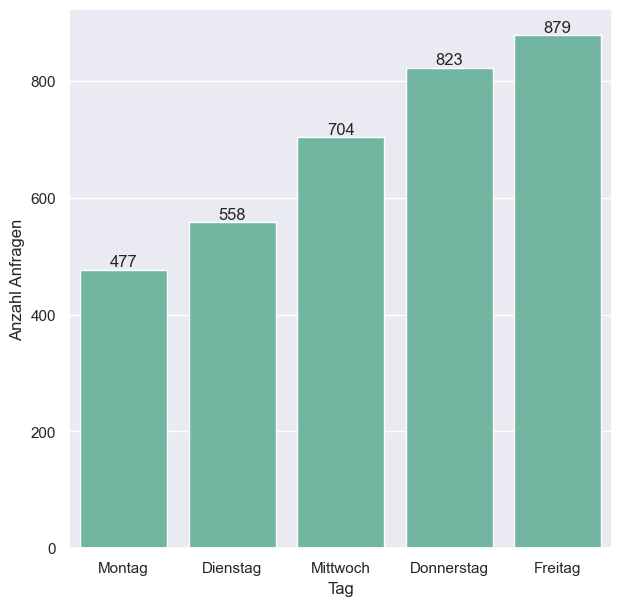

In [8]:
a4_dims = (7, 7)
fig, ax = plt.subplots(figsize=a4_dims)
chart = sns.countplot(noweekenddf, x="day", order=["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag"], ax=ax)
chart.set(xlabel='Tag', ylabel='Anzahl Anfragen')
ax.bar_label(ax.containers[0])
plt.show()

## Anfragen pro Methode

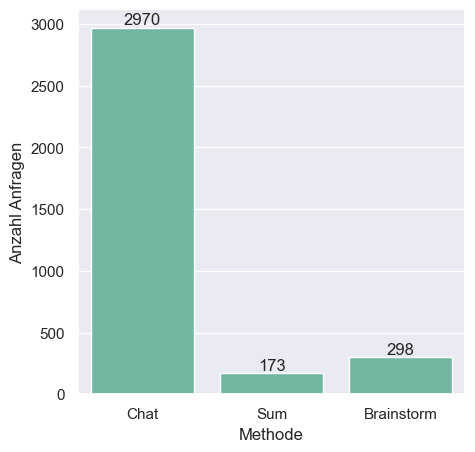

In [9]:
a4_dims = (5, 5)
fig, ax = plt.subplots(figsize=a4_dims)
chart = sns.countplot(noweekenddf, x="method", ax=ax)
chart.set(xlabel='Methode', ylabel='Anzahl Anfragen')
ax.bar_label(ax.containers[0])
plt.show()

## Anfragen pro Tag x seit Beginn

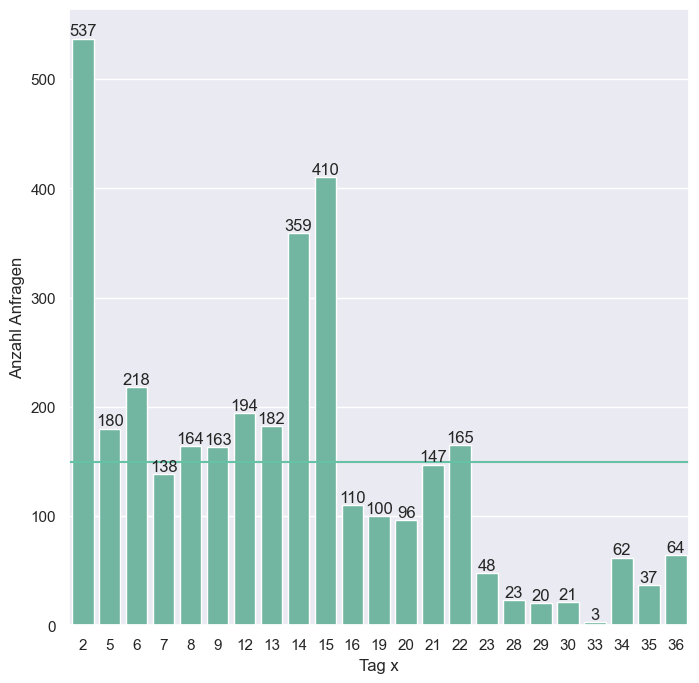

In [10]:
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
chart = sns.countplot(noweekenddf, x="dayscount", ax=ax)
chart.set(xlabel='Tag x', ylabel='Anzahl Anfragen')
meanday = noweekenddf.groupby(['dayscount'])[["dayscount"]].count()['dayscount'].mean()
ax.bar_label(ax.containers[0])
plt.axhline(y=meanday)
plt.show()

## Anfragen pro Stunde

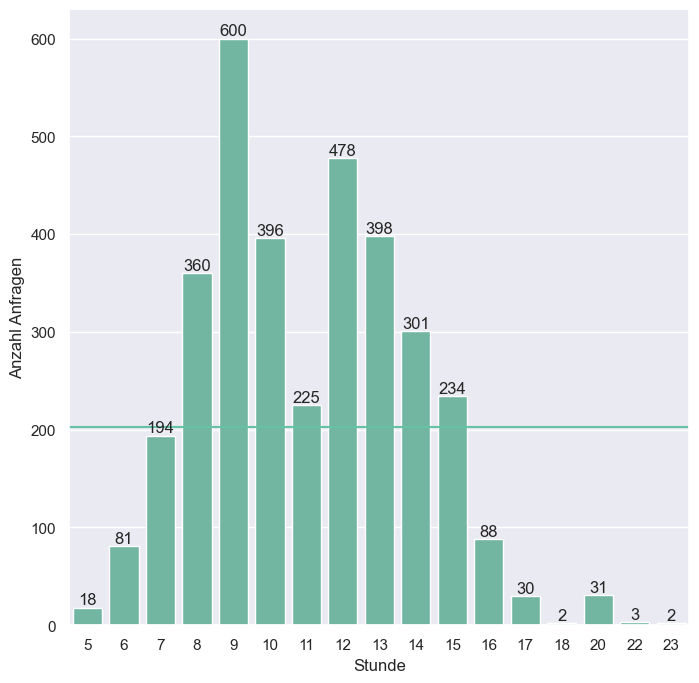

In [11]:
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
chart = sns.countplot(noweekenddf, x="hour", ax=ax)
chart.set(xlabel='Stunde', ylabel='Anzahl Anfragen')
meanhour = noweekenddf.groupby(['hour'])[["hour"]].count()['hour'].mean()
plt.axhline(y=meanhour)
ax.bar_label(ax.containers[0])
plt.show()

## Verteilung der Anfragen pro Tag pro Stunde

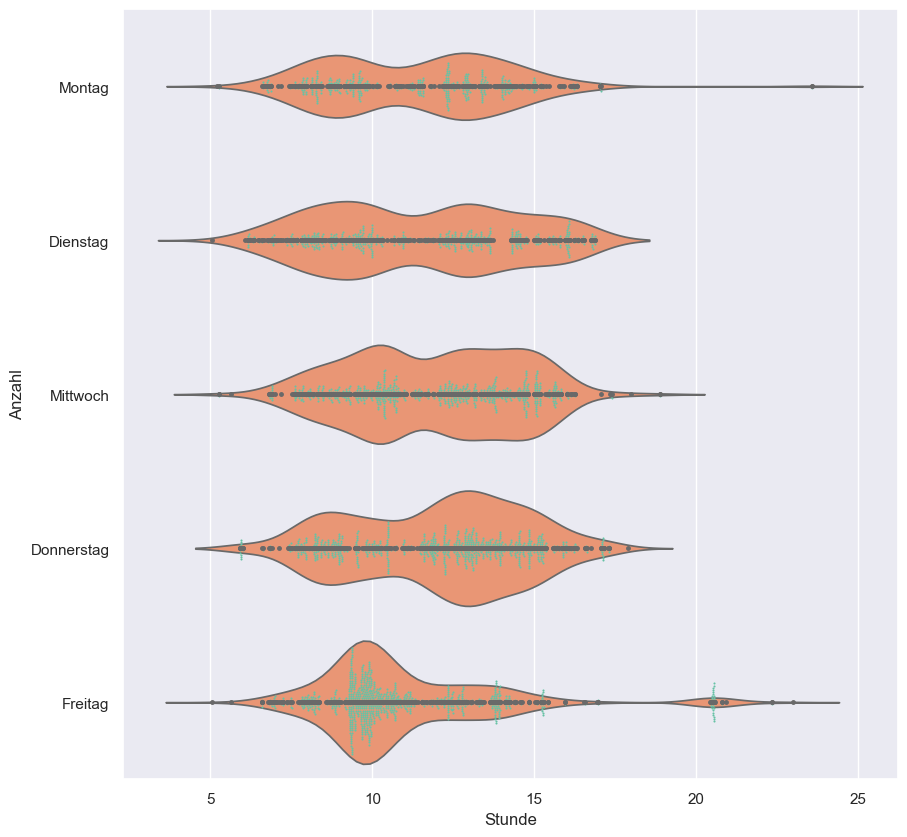

In [12]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)

swarm = sns.swarmplot(data=noweekenddf, x="hourminute", y="day", size=1.5, ax=ax, order=["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag"])
chart = sns.violinplot(data=noweekenddf, x="hourminute", y="day", ax=ax, inner="point",  density_norm="count")

swarm.set(xlabel='Stunde', ylabel='Anzahl')
plt.show()

## Token pro Abteilung für die Top 10

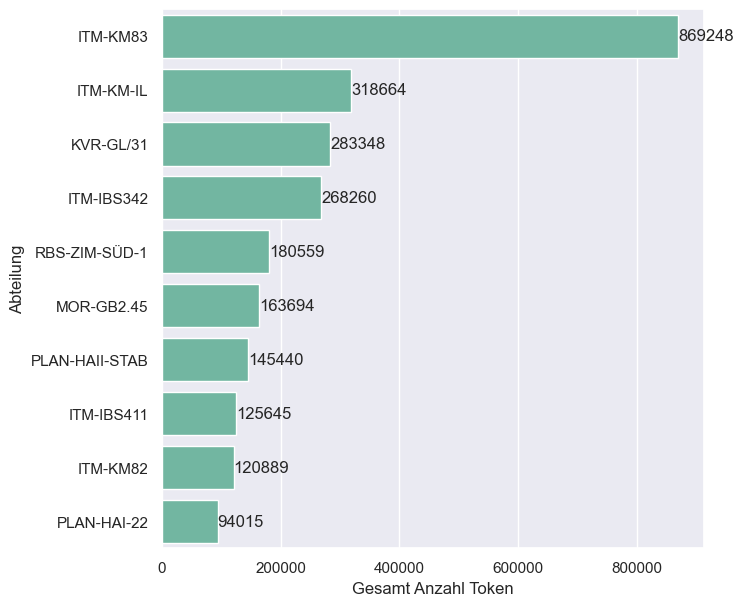

In [13]:
a4_dims = (7, 7)
fig, ax = plt.subplots(figsize=a4_dims)
token_per_department_df = df.groupby(['department'])[["tokencount"]].sum().sort_values(by="tokencount", ascending=False)[0:10]
chart = sns.barplot(token_per_department_df, x="tokencount", y="department", ax=ax)
chart.set(xlabel='Gesamt Anzahl Token', ylabel='Abteilung')

ax.bar_label(ax.containers[0])
plt.show()

## Anfragen pro Abteilung für die Top 10

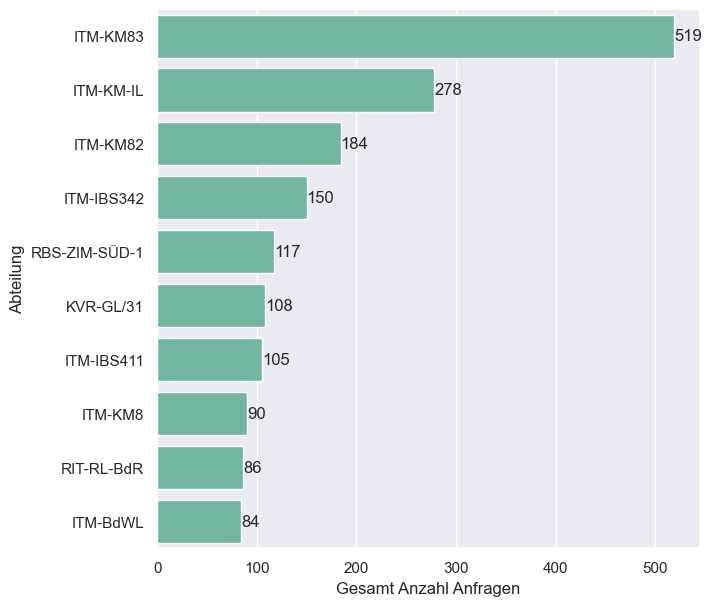

In [14]:
a4_dims = (7, 7)
fig, ax = plt.subplots(figsize=a4_dims)
anfragen_per_department_df = df.groupby(['department'])[["tokencount"]].count().sort_values(by="tokencount", ascending=False)[0:10]
chart = sns.barplot(anfragen_per_department_df, x="tokencount", y="department",ax=ax)
chart.set(xlabel='Gesamt Anzahl Anfragen', ylabel='Abteilung')
ax.bar_label(ax.containers[0])
plt.show()